<a href="https://colab.research.google.com/github/Ayushn24/Gradient-Descent-from-scratch/blob/main/gradient_descent_implementation_Example_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
class GradientDescentOptimizer:

    def __init__(self, epochs=1000, lr=0.01, lr_f=0.0001, loss="mse", random_state=42,
                 tolerance=0.0000001, variable_lr=False, early_stopping=False):

        self.epochs = epochs                   # Maximum number of iterations
        self.lr = lr                           # Initial learning rate
        self.lr_f = lr_f                       # Final learning rate (for exponential decay if "variable_lr" is True)
        self.loss = loss                       # Loss function (only "mse" supported)
        self.random_state = random_state       # Seed for reproducibility
        self.tolerance = tolerance             # Convergence threshold - Difference between two consecutive losses
        self.variable_lr = variable_lr         # Whether to use decay learning rate
        self.early_stopping = early_stopping   # Whether to stop early on convergence and prevent overtraining
        self.errors = []                       # Stores error per epoch
        self.w = None                          # Weights
        self.b = None                          # Bias
        self.lr_decay = []                     # Stores learning rate history

    def optimize(self, features, targets): # The features and targets should be pandas Series or DataFrames
        # Convert inputs to numpy arrays for efficient computation
        if isinstance(features, pd.Series):
            features = features.to_frame()
        sample_num, feature_num = features.shape

        feature_arr = features.to_numpy().reshape(sample_num, feature_num)
        targets_arr = targets.to_numpy().reshape(sample_num, 1)

        # Initialize weights and bias (small random values)
        np.random.seed(self.random_state)
        self.w = np.random.rand(feature_num, 1) * 0.01
        self.b = np.random.rand(1, 1) * 0.01

        # Store the initial learning rate to init_lr variable for later learning rate calculations if using variable learning rate
        if self.variable_lr:
            init_lr = self.lr

        # Calculate the learning rate decay constant 'k' (if variable_lr is enabled)
        if self.variable_lr:
            k = (np.log(self.lr / self.lr_f)) / self.epochs

        # Main training loop
        for e in range(1, self.epochs + 1):
            # Forward pass: compute predictions
            y_pred = np.dot(feature_arr, self.w) + self.b

            # Compute error based on loss function
            if self.loss == "mse":
                error = y_pred - targets_arr
                mse_loss = np.mean(error ** 2)

            # Backpropagation: compute gradients
            if self.loss == "mse":
                dw = (2 / sample_num) * np.dot(feature_arr.T, error)  # Gradient w.r.t. weights
                db = (2 / sample_num) * np.sum(error)                 # Gradient w.r.t. bias

            # Store current learning rate before update
            self.lr_decay.append(self.lr)
            # Parameter update step
            self.w -= self.lr * dw
            self.b -= self.lr * db

            # Update learning rate if variable_lr is True
            if self.variable_lr:
                self.lr = init_lr * np.exp(-k * e)

            # Store current loss
            self.errors.append(mse_loss)

            # Check convergence (if early stopping is enabled)
            if self.early_stopping and e > 1:
                if abs(self.errors[-1] - self.errors[-2]) < self.tolerance:
                    return f"[Early_Stopping - ON] Early convergence achieved successfully at {e} epochs !!!"
                # If not converged, simply continue
                elif abs(self.errors[-1] - self.errors[-2]) > self.tolerance:
                    pass

        # Final convergence message depending on settings
        if abs(self.errors[-1] - self.errors[-2]) < self.tolerance and not self.early_stopping:
            return f"[Early_Stopping - OFF] Successful convergence at {self.epochs} epochs !!!"
        elif abs(self.errors[-1] - self.errors[-2]) > self.tolerance and not self.early_stopping:
            return f"[Early_Stopping - OFF] Convergence failed at {self.epochs} epochs. Try changing parameters or increase the number of epochs."
        elif abs(self.errors[-1] - self.errors[-2]) > self.tolerance and self.early_stopping:
            return f"[Early_Stopping - ON] Convergence failed at {self.epochs} epochs. Try changing parameters or increase the number of epochs."

In [3]:
df = pd.DataFrame({"f":[1,2,3,4,5,6,7,8,9,10],
"t":[3*i - 4.8 for i in [1,2,3,4,5,6,7,8,9,10]]})

In [4]:
df #here the equation is y = 3x -4.8, so weights is 3 and bias is -4.8, lets see whether we can predict these parameters using gradient descent algorithm

,f,t
0,1,-1.8
1,2,1.2
2,3,4.2
3,4,7.2
4,5,10.2
5,6,13.2
6,7,16.2
7,8,19.2
8,9,22.2
9,10,25.2


In [5]:
x = df["f"]
y = df["t"]

In [6]:
#We will start with early stopping to see how it performs

In [7]:
optimizer_1 = GradientDescentOptimizer(epochs = 10000, variable_lr=True, early_stopping=True)

In [8]:
optimizer_1.optimize(features= x, targets = y)

'[Early_Stopping - ON] Early convergence achieved successfully at 2325 epochs !!!'

In [9]:
print(f"The optimal weights is {optimizer_1.w} and optimal bias is {optimizer_1.b}") #2.99vvery close to 3 and -4.787 very close to -4.8

The optimal weights is [[2.99817803]] and optimal bias is [[-4.78731575]]


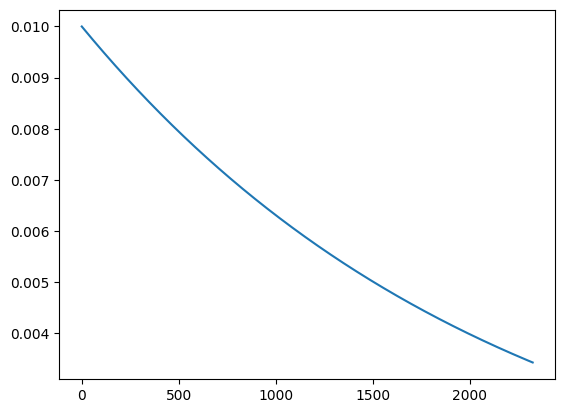

In [10]:
plt.plot(optimizer_1.lr_decay)

Text(0.5, 1.0, 'errors vs epochs')

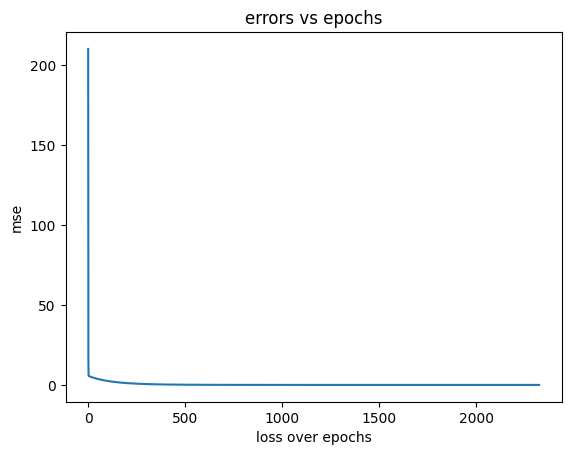

In [11]:
plt.plot(optimizer_1.errors)
plt.xlabel("loss over epochs")
plt.ylabel("mse")
plt.title("errors vs epochs")